In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Not really needed, but nicer plots
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("talk")

In [2]:
# Install TensorFlow by updating the conda environment

import tensorflow as tf
print('You have tensorflow version:', tf.__version__, '(must be at least 2.0.0)')

You have tensorflow version: 2.6.0 (must be at least 2.0.0)


In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# The shape of the training data
x_train.shape

(60000, 28, 28)

In [5]:
# Each training label is an integer
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

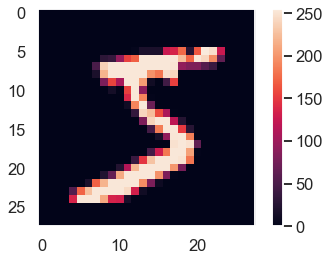

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

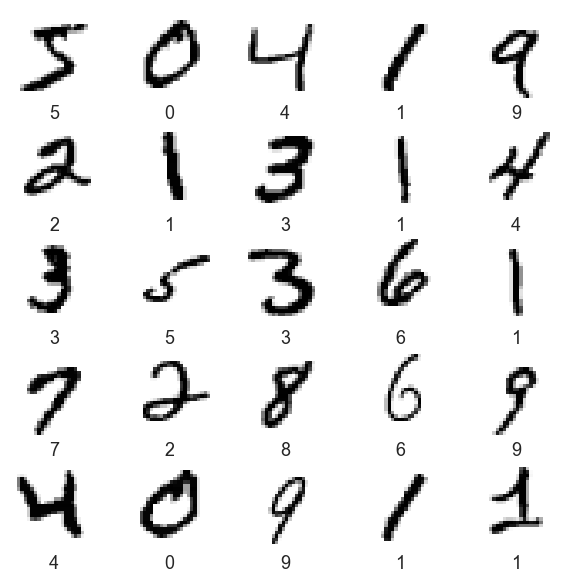

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[i]))


In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

2021-10-09 09:34:05.203929: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=10)

2021-10-09 09:34:05.390751: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


   1/1875 [..............................] - ETA: 9:22 - loss: 2.2530 - accuracy: 0.0938

  47/1875 [..............................] - ETA: 2s - loss: 1.3335 - accuracy: 0.6343  

  94/1875 [>.............................] - ETA: 1s - loss: 0.9796 - accuracy: 0.7294

 140/1875 [=>............................] - ETA: 1s - loss: 0.8374 - accuracy: 0.7679

 186/1875 [=>............................] - ETA: 1s - loss: 0.7508 - accuracy: 0.7902

 232/1875 [==>...........................] - ETA: 1s - loss: 0.6822 - accuracy: 0.8082

 279/1875 [===>..........................] - ETA: 1s - loss: 0.6255 - accuracy: 0.8229

 326/1875 [====>.........................] - ETA: 1s - loss: 0.5867 - accuracy: 0.8329

 372/1875 [====>.........................] - ETA: 1s - loss: 0.5538 - accuracy: 0.8418

 419/1875 [=====>........................] - ETA: 1s - loss: 0.5265 - accuracy: 0.8488

 465/1875 [======>.......................] - ETA: 1s - loss: 0.5095 - accuracy: 0.8524

 513/1875 [=======>......................] - ETA: 1s - loss: 0.4892 - accuracy: 0.8588

 558/1875 [=======>......................] - ETA: 1s - loss: 0.4729 - accuracy: 0.8637

 604/1875 [========>.....................] - ETA: 1s - loss: 0.4598 - accuracy: 0.8670

 650/1875 [=========>....................] - ETA: 1s - loss: 0.4465 - accuracy: 0.8706

 697/1875 [==========>...................] - ETA: 1s - loss: 0.4368 - accuracy: 0.8737

 743/1875 [==========>...................] - ETA: 1s - loss: 0.4259 - accuracy: 0.8769

 788/1875 [===========>..................] - ETA: 1s - loss: 0.4155 - accuracy: 0.8798

 835/1875 [============>.................] - ETA: 1s - loss: 0.4058 - accuracy: 0.8822

 882/1875 [=============>................] - ETA: 1s - loss: 0.3989 - accuracy: 0.8846

 929/1875 [=============>................] - ETA: 1s - loss: 0.3914 - accuracy: 0.8869

 976/1875 [==============>...............] - ETA: 0s - loss: 0.3839 - accuracy: 0.8892

1022/1875 [===============>..............] - ETA: 0s - loss: 0.3761 - accuracy: 0.8915

1069/1875 [================>.............] - ETA: 0s - loss: 0.3694 - accuracy: 0.8931

1116/1875 [================>.............] - ETA: 0s - loss: 0.3632 - accuracy: 0.8947

1163/1875 [=================>............] - ETA: 0s - loss: 0.3561 - accuracy: 0.8967

1208/1875 [==================>...........] - ETA: 0s - loss: 0.3505 - accuracy: 0.8983

1254/1875 [===================>..........] - ETA: 0s - loss: 0.3455 - accuracy: 0.8994

1301/1875 [===================>..........] - ETA: 0s - loss: 0.3406 - accuracy: 0.9009

1346/1875 [====================>.........] - ETA: 0s - loss: 0.3358 - accuracy: 0.9023

1391/1875 [=====================>........] - ETA: 0s - loss: 0.3321 - accuracy: 0.9032

1437/1875 [=====================>........] - ETA: 0s - loss: 0.3284 - accuracy: 0.9043

1484/1875 [======================>.......] - ETA: 0s - loss: 0.3239 - accuracy: 0.9057

1530/1875 [=======================>......] - ETA: 0s - loss: 0.3196 - accuracy: 0.9070

1576/1875 [========================>.....] - ETA: 0s - loss: 0.3164 - accuracy: 0.9080

1621/1875 [========================>.....] - ETA: 0s - loss: 0.3126 - accuracy: 0.9091

1667/1875 [=========================>....] - ETA: 0s - loss: 0.3095 - accuracy: 0.9102

1713/1875 [==========================>...] - ETA: 0s - loss: 0.3056 - accuracy: 0.9111

1758/1875 [===========================>..] - ETA: 0s - loss: 0.3024 - accuracy: 0.9122

1805/1875 [===========================>..] - ETA: 0s - loss: 0.2998 - accuracy: 0.9130

1852/1875 [============================>.] - ETA: 0s - loss: 0.2973 - accuracy: 0.9138

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2957 - accuracy: 0.9143


Epoch 2/10
   1/1875 [..............................] - ETA: 2s - loss: 0.1000 - accuracy: 0.9688

  47/1875 [..............................] - ETA: 2s - loss: 0.1385 - accuracy: 0.9621

  95/1875 [>.............................] - ETA: 1s - loss: 0.1538 - accuracy: 0.9556

 141/1875 [=>............................] - ETA: 1s - loss: 0.1623 - accuracy: 0.9523

 187/1875 [=>............................] - ETA: 1s - loss: 0.1570 - accuracy: 0.9540

 233/1875 [==>...........................] - ETA: 1s - loss: 0.1599 - accuracy: 0.9528

 280/1875 [===>..........................] - ETA: 1s - loss: 0.1612 - accuracy: 0.9522

 327/1875 [====>.........................] - ETA: 1s - loss: 0.1612 - accuracy: 0.9526

 373/1875 [====>.........................] - ETA: 1s - loss: 0.1599 - accuracy: 0.9527

 420/1875 [=====>........................] - ETA: 1s - loss: 0.1576 - accuracy: 0.9528

 465/1875 [======>.......................] - ETA: 1s - loss: 0.1597 - accuracy: 0.9520

 511/1875 [=======>......................] - ETA: 1s - loss: 0.1590 - accuracy: 0.9524

 558/1875 [=======>......................] - ETA: 1s - loss: 0.1594 - accuracy: 0.9526

 604/1875 [========>.....................] - ETA: 1s - loss: 0.1580 - accuracy: 0.9524

 651/1875 [=========>....................] - ETA: 1s - loss: 0.1577 - accuracy: 0.9522

 697/1875 [==========>...................] - ETA: 1s - loss: 0.1565 - accuracy: 0.9525

 740/1875 [==========>...................] - ETA: 1s - loss: 0.1553 - accuracy: 0.9527

 785/1875 [===========>..................] - ETA: 1s - loss: 0.1551 - accuracy: 0.9528

 831/1875 [============>.................] - ETA: 1s - loss: 0.1530 - accuracy: 0.9535

 877/1875 [=============>................] - ETA: 1s - loss: 0.1524 - accuracy: 0.9539

 923/1875 [=============>................] - ETA: 1s - loss: 0.1508 - accuracy: 0.9545

 969/1875 [==============>...............] - ETA: 0s - loss: 0.1510 - accuracy: 0.9547

1016/1875 [===============>..............] - ETA: 0s - loss: 0.1513 - accuracy: 0.9547

1062/1875 [===============>..............] - ETA: 0s - loss: 0.1510 - accuracy: 0.9549

1108/1875 [================>.............] - ETA: 0s - loss: 0.1519 - accuracy: 0.9547

1155/1875 [=================>............] - ETA: 0s - loss: 0.1525 - accuracy: 0.9545

1201/1875 [==================>...........] - ETA: 0s - loss: 0.1521 - accuracy: 0.9548

1248/1875 [==================>...........] - ETA: 0s - loss: 0.1510 - accuracy: 0.9553

1295/1875 [===================>..........] - ETA: 0s - loss: 0.1509 - accuracy: 0.9553

1341/1875 [====================>.........] - ETA: 0s - loss: 0.1509 - accuracy: 0.9551

1388/1875 [=====================>........] - ETA: 0s - loss: 0.1501 - accuracy: 0.9554

1435/1875 [=====================>........] - ETA: 0s - loss: 0.1504 - accuracy: 0.9554

1481/1875 [======================>.......] - ETA: 0s - loss: 0.1505 - accuracy: 0.9556

1527/1875 [=======================>......] - ETA: 0s - loss: 0.1499 - accuracy: 0.9558

1573/1875 [========================>.....] - ETA: 0s - loss: 0.1487 - accuracy: 0.9562

1619/1875 [========================>.....] - ETA: 0s - loss: 0.1485 - accuracy: 0.9564

1665/1875 [=========================>....] - ETA: 0s - loss: 0.1484 - accuracy: 0.9564

1712/1875 [==========================>...] - ETA: 0s - loss: 0.1474 - accuracy: 0.9567

1758/1875 [===========================>..] - ETA: 0s - loss: 0.1470 - accuracy: 0.9567

1804/1875 [===========================>..] - ETA: 0s - loss: 0.1468 - accuracy: 0.9569

1851/1875 [============================>.] - ETA: 0s - loss: 0.1466 - accuracy: 0.9570

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1465 - accuracy: 0.9571


Epoch 3/10
   1/1875 [..............................] - ETA: 3s - loss: 0.0383 - accuracy: 1.0000

  48/1875 [..............................] - ETA: 1s - loss: 0.0907 - accuracy: 0.9740

  94/1875 [>.............................] - ETA: 1s - loss: 0.0969 - accuracy: 0.9701

 140/1875 [=>............................] - ETA: 1s - loss: 0.0974 - accuracy: 0.9708

 186/1875 [=>............................] - ETA: 1s - loss: 0.1041 - accuracy: 0.9696

 233/1875 [==>...........................] - ETA: 1s - loss: 0.1019 - accuracy: 0.9708

 279/1875 [===>..........................] - ETA: 1s - loss: 0.1010 - accuracy: 0.9710

 326/1875 [====>.........................] - ETA: 1s - loss: 0.1052 - accuracy: 0.9692

 374/1875 [====>.........................] - ETA: 1s - loss: 0.1052 - accuracy: 0.9694

 420/1875 [=====>........................] - ETA: 1s - loss: 0.1044 - accuracy: 0.9689

 465/1875 [======>.......................] - ETA: 1s - loss: 0.1077 - accuracy: 0.9679

 511/1875 [=======>......................] - ETA: 1s - loss: 0.1075 - accuracy: 0.9681

 557/1875 [=======>......................] - ETA: 1s - loss: 0.1074 - accuracy: 0.9679

 604/1875 [========>.....................] - ETA: 1s - loss: 0.1067 - accuracy: 0.9683

 651/1875 [=========>....................] - ETA: 1s - loss: 0.1070 - accuracy: 0.9678

 698/1875 [==========>...................] - ETA: 1s - loss: 0.1065 - accuracy: 0.9678

 744/1875 [==========>...................] - ETA: 1s - loss: 0.1065 - accuracy: 0.9679

 791/1875 [===========>..................] - ETA: 1s - loss: 0.1072 - accuracy: 0.9679

 837/1875 [============>.................] - ETA: 1s - loss: 0.1071 - accuracy: 0.9680

 884/1875 [=============>................] - ETA: 1s - loss: 0.1071 - accuracy: 0.9678

 930/1875 [=============>................] - ETA: 1s - loss: 0.1071 - accuracy: 0.9675

 976/1875 [==============>...............] - ETA: 0s - loss: 0.1076 - accuracy: 0.9674

1021/1875 [===============>..............] - ETA: 0s - loss: 0.1078 - accuracy: 0.9672

1066/1875 [================>.............] - ETA: 0s - loss: 0.1073 - accuracy: 0.9673

1112/1875 [================>.............] - ETA: 0s - loss: 0.1071 - accuracy: 0.9674

1159/1875 [=================>............] - ETA: 0s - loss: 0.1071 - accuracy: 0.9674

1205/1875 [==================>...........] - ETA: 0s - loss: 0.1074 - accuracy: 0.9675

1252/1875 [===================>..........] - ETA: 0s - loss: 0.1070 - accuracy: 0.9675

1299/1875 [===================>..........] - ETA: 0s - loss: 0.1072 - accuracy: 0.9675

1345/1875 [====================>.........] - ETA: 0s - loss: 0.1076 - accuracy: 0.9674

1392/1875 [=====================>........] - ETA: 0s - loss: 0.1081 - accuracy: 0.9672

1439/1875 [======================>.......] - ETA: 0s - loss: 0.1082 - accuracy: 0.9672

1485/1875 [======================>.......] - ETA: 0s - loss: 0.1086 - accuracy: 0.9670

1529/1875 [=======================>......] - ETA: 0s - loss: 0.1090 - accuracy: 0.9668

1573/1875 [========================>.....] - ETA: 0s - loss: 0.1094 - accuracy: 0.9667

1618/1875 [========================>.....] - ETA: 0s - loss: 0.1101 - accuracy: 0.9666

1663/1875 [=========================>....] - ETA: 0s - loss: 0.1103 - accuracy: 0.9666

1710/1875 [==========================>...] - ETA: 0s - loss: 0.1098 - accuracy: 0.9667

1757/1875 [===========================>..] - ETA: 0s - loss: 0.1095 - accuracy: 0.9667

1803/1875 [===========================>..] - ETA: 0s - loss: 0.1095 - accuracy: 0.9668

1849/1875 [============================>.] - ETA: 0s - loss: 0.1095 - accuracy: 0.9669

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1099 - accuracy: 0.9668


Epoch 4/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0594 - accuracy: 1.0000

  46/1875 [..............................] - ETA: 2s - loss: 0.0814 - accuracy: 0.9735

  92/1875 [>.............................] - ETA: 1s - loss: 0.0906 - accuracy: 0.9715

 138/1875 [=>............................] - ETA: 1s - loss: 0.0893 - accuracy: 0.9731

 185/1875 [=>............................] - ETA: 1s - loss: 0.0930 - accuracy: 0.9715

 231/1875 [==>...........................] - ETA: 1s - loss: 0.0930 - accuracy: 0.9705

 278/1875 [===>..........................] - ETA: 1s - loss: 0.0916 - accuracy: 0.9711

 324/1875 [====>.........................] - ETA: 1s - loss: 0.0891 - accuracy: 0.9718

 370/1875 [====>.........................] - ETA: 1s - loss: 0.0877 - accuracy: 0.9725

 416/1875 [=====>........................] - ETA: 1s - loss: 0.0870 - accuracy: 0.9730

 463/1875 [======>.......................] - ETA: 1s - loss: 0.0868 - accuracy: 0.9735

 510/1875 [=======>......................] - ETA: 1s - loss: 0.0863 - accuracy: 0.9734

 551/1875 [=======>......................] - ETA: 1s - loss: 0.0877 - accuracy: 0.9727

 597/1875 [========>.....................] - ETA: 1s - loss: 0.0871 - accuracy: 0.9726

 643/1875 [=========>....................] - ETA: 1s - loss: 0.0873 - accuracy: 0.9724

 690/1875 [==========>...................] - ETA: 1s - loss: 0.0876 - accuracy: 0.9722

 738/1875 [==========>...................] - ETA: 1s - loss: 0.0877 - accuracy: 0.9723

 784/1875 [===========>..................] - ETA: 1s - loss: 0.0871 - accuracy: 0.9727

 831/1875 [============>.................] - ETA: 1s - loss: 0.0873 - accuracy: 0.9727

 878/1875 [=============>................] - ETA: 1s - loss: 0.0875 - accuracy: 0.9725

 925/1875 [=============>................] - ETA: 1s - loss: 0.0877 - accuracy: 0.9724

 970/1875 [==============>...............] - ETA: 0s - loss: 0.0874 - accuracy: 0.9726

1016/1875 [===============>..............] - ETA: 0s - loss: 0.0884 - accuracy: 0.9724

1063/1875 [================>.............] - ETA: 0s - loss: 0.0883 - accuracy: 0.9724

1110/1875 [================>.............] - ETA: 0s - loss: 0.0877 - accuracy: 0.9727

1157/1875 [=================>............] - ETA: 0s - loss: 0.0877 - accuracy: 0.9724

1204/1875 [==================>...........] - ETA: 0s - loss: 0.0877 - accuracy: 0.9725

1249/1875 [==================>...........] - ETA: 0s - loss: 0.0878 - accuracy: 0.9724

1295/1875 [===================>..........] - ETA: 0s - loss: 0.0874 - accuracy: 0.9725

1339/1875 [====================>.........] - ETA: 0s - loss: 0.0878 - accuracy: 0.9723

1386/1875 [=====================>........] - ETA: 0s - loss: 0.0877 - accuracy: 0.9722

1433/1875 [=====================>........] - ETA: 0s - loss: 0.0874 - accuracy: 0.9722

1480/1875 [======================>.......] - ETA: 0s - loss: 0.0879 - accuracy: 0.9722

1528/1875 [=======================>......] - ETA: 0s - loss: 0.0880 - accuracy: 0.9721

1575/1875 [========================>.....] - ETA: 0s - loss: 0.0877 - accuracy: 0.9722

1622/1875 [========================>.....] - ETA: 0s - loss: 0.0877 - accuracy: 0.9721

1669/1875 [=========================>....] - ETA: 0s - loss: 0.0878 - accuracy: 0.9722

1716/1875 [==========================>...] - ETA: 0s - loss: 0.0877 - accuracy: 0.9722

1762/1875 [===========================>..] - ETA: 0s - loss: 0.0877 - accuracy: 0.9722

1808/1875 [===========================>..] - ETA: 0s - loss: 0.0881 - accuracy: 0.9721

1854/1875 [============================>.] - ETA: 0s - loss: 0.0882 - accuracy: 0.9721

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0883 - accuracy: 0.9721


Epoch 5/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0662 - accuracy: 1.0000

  47/1875 [..............................] - ETA: 2s - loss: 0.0670 - accuracy: 0.9820

  93/1875 [>.............................] - ETA: 1s - loss: 0.0710 - accuracy: 0.9815

 140/1875 [=>............................] - ETA: 1s - loss: 0.0703 - accuracy: 0.9806

 186/1875 [=>............................] - ETA: 1s - loss: 0.0687 - accuracy: 0.9803

 232/1875 [==>...........................] - ETA: 1s - loss: 0.0687 - accuracy: 0.9802

 279/1875 [===>..........................] - ETA: 1s - loss: 0.0689 - accuracy: 0.9795

 325/1875 [====>.........................] - ETA: 1s - loss: 0.0680 - accuracy: 0.9800

 370/1875 [====>.........................] - ETA: 1s - loss: 0.0718 - accuracy: 0.9790

 413/1875 [=====>........................] - ETA: 1s - loss: 0.0712 - accuracy: 0.9787

 458/1875 [======>.......................] - ETA: 1s - loss: 0.0706 - accuracy: 0.9788

 501/1875 [=======>......................] - ETA: 1s - loss: 0.0706 - accuracy: 0.9786

 547/1875 [=======>......................] - ETA: 1s - loss: 0.0703 - accuracy: 0.9788

 588/1875 [========>.....................] - ETA: 1s - loss: 0.0705 - accuracy: 0.9786

 625/1875 [=========>....................] - ETA: 1s - loss: 0.0693 - accuracy: 0.9788

 666/1875 [=========>....................] - ETA: 1s - loss: 0.0697 - accuracy: 0.9786

 712/1875 [==========>...................] - ETA: 1s - loss: 0.0695 - accuracy: 0.9786

 759/1875 [===========>..................] - ETA: 1s - loss: 0.0699 - accuracy: 0.9783

 800/1875 [===========>..................] - ETA: 1s - loss: 0.0702 - accuracy: 0.9782

 844/1875 [============>.................] - ETA: 1s - loss: 0.0701 - accuracy: 0.9781

 888/1875 [=============>................] - ETA: 1s - loss: 0.0699 - accuracy: 0.9780

 933/1875 [=============>................] - ETA: 1s - loss: 0.0704 - accuracy: 0.9778

 976/1875 [==============>...............] - ETA: 1s - loss: 0.0708 - accuracy: 0.9775

1020/1875 [===============>..............] - ETA: 0s - loss: 0.0711 - accuracy: 0.9774

1066/1875 [================>.............] - ETA: 0s - loss: 0.0714 - accuracy: 0.9773

1112/1875 [================>.............] - ETA: 0s - loss: 0.0717 - accuracy: 0.9772

1152/1875 [=================>............] - ETA: 0s - loss: 0.0720 - accuracy: 0.9772

1199/1875 [==================>...........] - ETA: 0s - loss: 0.0722 - accuracy: 0.9772

1245/1875 [==================>...........] - ETA: 0s - loss: 0.0723 - accuracy: 0.9771

1290/1875 [===================>..........] - ETA: 0s - loss: 0.0727 - accuracy: 0.9770

1332/1875 [====================>.........] - ETA: 0s - loss: 0.0735 - accuracy: 0.9768

1378/1875 [=====================>........] - ETA: 0s - loss: 0.0734 - accuracy: 0.9769

1422/1875 [=====================>........] - ETA: 0s - loss: 0.0735 - accuracy: 0.9769

1467/1875 [======================>.......] - ETA: 0s - loss: 0.0736 - accuracy: 0.9770

1512/1875 [=======================>......] - ETA: 0s - loss: 0.0734 - accuracy: 0.9770

1559/1875 [=======================>......] - ETA: 0s - loss: 0.0737 - accuracy: 0.9769

1601/1875 [========================>.....] - ETA: 0s - loss: 0.0740 - accuracy: 0.9769

1644/1875 [=========================>....] - ETA: 0s - loss: 0.0739 - accuracy: 0.9769

1690/1875 [==========================>...] - ETA: 0s - loss: 0.0741 - accuracy: 0.9769

1736/1875 [==========================>...] - ETA: 0s - loss: 0.0739 - accuracy: 0.9770

1781/1875 [===========================>..] - ETA: 0s - loss: 0.0742 - accuracy: 0.9768

1826/1875 [============================>.] - ETA: 0s - loss: 0.0741 - accuracy: 0.9768

1872/1875 [============================>.] - ETA: 0s - loss: 0.0743 - accuracy: 0.9767

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0742 - accuracy: 0.9767


Epoch 6/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0130 - accuracy: 1.0000

  46/1875 [..............................] - ETA: 2s - loss: 0.0785 - accuracy: 0.9715

  88/1875 [>.............................] - ETA: 2s - loss: 0.0723 - accuracy: 0.9751

 134/1875 [=>............................] - ETA: 1s - loss: 0.0652 - accuracy: 0.9769

 178/1875 [=>............................] - ETA: 1s - loss: 0.0668 - accuracy: 0.9770

 221/1875 [==>...........................] - ETA: 1s - loss: 0.0668 - accuracy: 0.9777

 268/1875 [===>..........................] - ETA: 1s - loss: 0.0658 - accuracy: 0.9777

 314/1875 [====>.........................] - ETA: 1s - loss: 0.0660 - accuracy: 0.9775

 359/1875 [====>.........................] - ETA: 1s - loss: 0.0669 - accuracy: 0.9770

 402/1875 [=====>........................] - ETA: 1s - loss: 0.0657 - accuracy: 0.9769

 448/1875 [======>.......................] - ETA: 1s - loss: 0.0651 - accuracy: 0.9777

 493/1875 [======>.......................] - ETA: 1s - loss: 0.0646 - accuracy: 0.9774

 538/1875 [=======>......................] - ETA: 1s - loss: 0.0640 - accuracy: 0.9774

 585/1875 [========>.....................] - ETA: 1s - loss: 0.0635 - accuracy: 0.9779

 632/1875 [=========>....................] - ETA: 1s - loss: 0.0639 - accuracy: 0.9782

 677/1875 [=========>....................] - ETA: 1s - loss: 0.0649 - accuracy: 0.9778

 722/1875 [==========>...................] - ETA: 1s - loss: 0.0647 - accuracy: 0.9777

 769/1875 [===========>..................] - ETA: 1s - loss: 0.0648 - accuracy: 0.9777

 816/1875 [============>.................] - ETA: 1s - loss: 0.0653 - accuracy: 0.9777

 861/1875 [============>.................] - ETA: 1s - loss: 0.0656 - accuracy: 0.9777

 906/1875 [=============>................] - ETA: 1s - loss: 0.0663 - accuracy: 0.9776

 952/1875 [==============>...............] - ETA: 1s - loss: 0.0660 - accuracy: 0.9779

 995/1875 [==============>...............] - ETA: 0s - loss: 0.0655 - accuracy: 0.9782

1042/1875 [===============>..............] - ETA: 0s - loss: 0.0655 - accuracy: 0.9783

1087/1875 [================>.............] - ETA: 0s - loss: 0.0656 - accuracy: 0.9784

1131/1875 [=================>............] - ETA: 0s - loss: 0.0655 - accuracy: 0.9784

1176/1875 [=================>............] - ETA: 0s - loss: 0.0648 - accuracy: 0.9787

1222/1875 [==================>...........] - ETA: 0s - loss: 0.0651 - accuracy: 0.9788

1267/1875 [===================>..........] - ETA: 0s - loss: 0.0649 - accuracy: 0.9788

1313/1875 [====================>.........] - ETA: 0s - loss: 0.0649 - accuracy: 0.9788

1357/1875 [====================>.........] - ETA: 0s - loss: 0.0647 - accuracy: 0.9790

1402/1875 [=====================>........] - ETA: 0s - loss: 0.0645 - accuracy: 0.9790

1446/1875 [======================>.......] - ETA: 0s - loss: 0.0645 - accuracy: 0.9790

1491/1875 [======================>.......] - ETA: 0s - loss: 0.0646 - accuracy: 0.9791

1538/1875 [=======================>......] - ETA: 0s - loss: 0.0646 - accuracy: 0.9791

1585/1875 [========================>.....] - ETA: 0s - loss: 0.0644 - accuracy: 0.9791

1631/1875 [=========================>....] - ETA: 0s - loss: 0.0647 - accuracy: 0.9790

1675/1875 [=========================>....] - ETA: 0s - loss: 0.0655 - accuracy: 0.9788

1721/1875 [==========================>...] - ETA: 0s - loss: 0.0656 - accuracy: 0.9789

1766/1875 [===========================>..] - ETA: 0s - loss: 0.0661 - accuracy: 0.9787

1811/1875 [===========================>..] - ETA: 0s - loss: 0.0657 - accuracy: 0.9788

1856/1875 [============================>.] - ETA: 0s - loss: 0.0660 - accuracy: 0.9789

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0662 - accuracy: 0.9789


Epoch 7/10
   1/1875 [..............................] - ETA: 2s - loss: 0.1070 - accuracy: 0.9688

  45/1875 [..............................] - ETA: 2s - loss: 0.0503 - accuracy: 0.9826

  88/1875 [>.............................] - ETA: 2s - loss: 0.0545 - accuracy: 0.9808

 134/1875 [=>............................] - ETA: 1s - loss: 0.0586 - accuracy: 0.9797

 178/1875 [=>............................] - ETA: 1s - loss: 0.0596 - accuracy: 0.9788

 224/1875 [==>...........................] - ETA: 1s - loss: 0.0604 - accuracy: 0.9788

 271/1875 [===>..........................] - ETA: 1s - loss: 0.0571 - accuracy: 0.9799

 317/1875 [====>.........................] - ETA: 1s - loss: 0.0584 - accuracy: 0.9800

 364/1875 [====>.........................] - ETA: 1s - loss: 0.0582 - accuracy: 0.9805

 411/1875 [=====>........................] - ETA: 1s - loss: 0.0584 - accuracy: 0.9809

 458/1875 [======>.......................] - ETA: 1s - loss: 0.0584 - accuracy: 0.9807

 505/1875 [=======>......................] - ETA: 1s - loss: 0.0589 - accuracy: 0.9806

 551/1875 [=======>......................] - ETA: 1s - loss: 0.0600 - accuracy: 0.9800

 598/1875 [========>.....................] - ETA: 1s - loss: 0.0599 - accuracy: 0.9803

 645/1875 [=========>....................] - ETA: 1s - loss: 0.0600 - accuracy: 0.9802

 691/1875 [==========>...................] - ETA: 1s - loss: 0.0604 - accuracy: 0.9804

 738/1875 [==========>...................] - ETA: 1s - loss: 0.0592 - accuracy: 0.9809

 784/1875 [===========>..................] - ETA: 1s - loss: 0.0594 - accuracy: 0.9810

 830/1875 [============>.................] - ETA: 1s - loss: 0.0587 - accuracy: 0.9814

 876/1875 [=============>................] - ETA: 1s - loss: 0.0589 - accuracy: 0.9812

 922/1875 [=============>................] - ETA: 1s - loss: 0.0596 - accuracy: 0.9810

 969/1875 [==============>...............] - ETA: 0s - loss: 0.0592 - accuracy: 0.9811

1016/1875 [===============>..............] - ETA: 0s - loss: 0.0587 - accuracy: 0.9811

1061/1875 [===============>..............] - ETA: 0s - loss: 0.0581 - accuracy: 0.9813

1106/1875 [================>.............] - ETA: 0s - loss: 0.0580 - accuracy: 0.9813

1152/1875 [=================>............] - ETA: 0s - loss: 0.0581 - accuracy: 0.9812

1199/1875 [==================>...........] - ETA: 0s - loss: 0.0579 - accuracy: 0.9815

1246/1875 [==================>...........] - ETA: 0s - loss: 0.0577 - accuracy: 0.9815

1293/1875 [===================>..........] - ETA: 0s - loss: 0.0578 - accuracy: 0.9815

1339/1875 [====================>.........] - ETA: 0s - loss: 0.0576 - accuracy: 0.9814

1385/1875 [=====================>........] - ETA: 0s - loss: 0.0576 - accuracy: 0.9813

1431/1875 [=====================>........] - ETA: 0s - loss: 0.0576 - accuracy: 0.9815

1477/1875 [======================>.......] - ETA: 0s - loss: 0.0573 - accuracy: 0.9817

1524/1875 [=======================>......] - ETA: 0s - loss: 0.0574 - accuracy: 0.9817

1571/1875 [========================>.....] - ETA: 0s - loss: 0.0574 - accuracy: 0.9818

1618/1875 [========================>.....] - ETA: 0s - loss: 0.0577 - accuracy: 0.9817

1666/1875 [=========================>....] - ETA: 0s - loss: 0.0578 - accuracy: 0.9816

1712/1875 [==========================>...] - ETA: 0s - loss: 0.0578 - accuracy: 0.9816

1758/1875 [===========================>..] - ETA: 0s - loss: 0.0582 - accuracy: 0.9813

1804/1875 [===========================>..] - ETA: 0s - loss: 0.0583 - accuracy: 0.9813

1850/1875 [============================>.] - ETA: 0s - loss: 0.0582 - accuracy: 0.9813

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0578 - accuracy: 0.9814


Epoch 8/10
   1/1875 [..............................] - ETA: 3s - loss: 0.1154 - accuracy: 0.9688

  47/1875 [..............................] - ETA: 1s - loss: 0.0456 - accuracy: 0.9827

  94/1875 [>.............................] - ETA: 1s - loss: 0.0534 - accuracy: 0.9801

 140/1875 [=>............................] - ETA: 1s - loss: 0.0603 - accuracy: 0.9786

 186/1875 [=>............................] - ETA: 1s - loss: 0.0562 - accuracy: 0.9807

 232/1875 [==>...........................] - ETA: 1s - loss: 0.0578 - accuracy: 0.9799

 278/1875 [===>..........................] - ETA: 1s - loss: 0.0543 - accuracy: 0.9809

 325/1875 [====>.........................] - ETA: 1s - loss: 0.0538 - accuracy: 0.9813

 372/1875 [====>.........................] - ETA: 1s - loss: 0.0540 - accuracy: 0.9814

 416/1875 [=====>........................] - ETA: 1s - loss: 0.0517 - accuracy: 0.9823

 462/1875 [======>.......................] - ETA: 1s - loss: 0.0518 - accuracy: 0.9823

 509/1875 [=======>......................] - ETA: 1s - loss: 0.0511 - accuracy: 0.9824

 557/1875 [=======>......................] - ETA: 1s - loss: 0.0506 - accuracy: 0.9828

 605/1875 [========>.....................] - ETA: 1s - loss: 0.0500 - accuracy: 0.9832

 651/1875 [=========>....................] - ETA: 1s - loss: 0.0506 - accuracy: 0.9827

 697/1875 [==========>...................] - ETA: 1s - loss: 0.0512 - accuracy: 0.9828

 743/1875 [==========>...................] - ETA: 1s - loss: 0.0507 - accuracy: 0.9831

 790/1875 [===========>..................] - ETA: 1s - loss: 0.0505 - accuracy: 0.9831

 837/1875 [============>.................] - ETA: 1s - loss: 0.0496 - accuracy: 0.9834

 885/1875 [=============>................] - ETA: 1s - loss: 0.0507 - accuracy: 0.9831

 933/1875 [=============>................] - ETA: 1s - loss: 0.0502 - accuracy: 0.9834

 979/1875 [==============>...............] - ETA: 0s - loss: 0.0502 - accuracy: 0.9833

1025/1875 [===============>..............] - ETA: 0s - loss: 0.0502 - accuracy: 0.9832

1071/1875 [================>.............] - ETA: 0s - loss: 0.0504 - accuracy: 0.9829

1119/1875 [================>.............] - ETA: 0s - loss: 0.0505 - accuracy: 0.9828

1163/1875 [=================>............] - ETA: 0s - loss: 0.0509 - accuracy: 0.9828

1207/1875 [==================>...........] - ETA: 0s - loss: 0.0506 - accuracy: 0.9829

1252/1875 [===================>..........] - ETA: 0s - loss: 0.0507 - accuracy: 0.9828

1298/1875 [===================>..........] - ETA: 0s - loss: 0.0514 - accuracy: 0.9824

1345/1875 [====================>.........] - ETA: 0s - loss: 0.0516 - accuracy: 0.9825

1392/1875 [=====================>........] - ETA: 0s - loss: 0.0520 - accuracy: 0.9824

1439/1875 [======================>.......] - ETA: 0s - loss: 0.0514 - accuracy: 0.9826

1487/1875 [======================>.......] - ETA: 0s - loss: 0.0511 - accuracy: 0.9828



1534/1875 [=======================>......] - ETA: 0s - loss: 0.0513 - accuracy: 0.9827

1580/1875 [========================>.....] - ETA: 0s - loss: 0.0513 - accuracy: 0.9827

1625/1875 [=========================>....] - ETA: 0s - loss: 0.0512 - accuracy: 0.9827

1672/1875 [=========================>....] - ETA: 0s - loss: 0.0512 - accuracy: 0.9827

1719/1875 [==========================>...] - ETA: 0s - loss: 0.0511 - accuracy: 0.9827

1766/1875 [===========================>..] - ETA: 0s - loss: 0.0513 - accuracy: 0.9827

1813/1875 [============================>.] - ETA: 0s - loss: 0.0517 - accuracy: 0.9826

1860/1875 [============================>.] - ETA: 0s - loss: 0.0515 - accuracy: 0.9827

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0517 - accuracy: 0.9826


Epoch 9/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0131 - accuracy: 1.0000

  48/1875 [..............................] - ETA: 1s - loss: 0.0716 - accuracy: 0.9811

  95/1875 [>.............................] - ETA: 1s - loss: 0.0614 - accuracy: 0.9809

 141/1875 [=>............................] - ETA: 1s - loss: 0.0525 - accuracy: 0.9836

 187/1875 [=>............................] - ETA: 1s - loss: 0.0524 - accuracy: 0.9836

 233/1875 [==>...........................] - ETA: 1s - loss: 0.0478 - accuracy: 0.9852

 279/1875 [===>..........................] - ETA: 1s - loss: 0.0470 - accuracy: 0.9852

 325/1875 [====>.........................] - ETA: 1s - loss: 0.0455 - accuracy: 0.9854

 372/1875 [====>.........................] - ETA: 1s - loss: 0.0461 - accuracy: 0.9848

 419/1875 [=====>........................] - ETA: 1s - loss: 0.0454 - accuracy: 0.9851

 467/1875 [======>.......................] - ETA: 1s - loss: 0.0448 - accuracy: 0.9851

 514/1875 [=======>......................] - ETA: 1s - loss: 0.0444 - accuracy: 0.9855

 561/1875 [=======>......................] - ETA: 1s - loss: 0.0452 - accuracy: 0.9855

 607/1875 [========>.....................] - ETA: 1s - loss: 0.0454 - accuracy: 0.9855

 653/1875 [=========>....................] - ETA: 1s - loss: 0.0452 - accuracy: 0.9858

 700/1875 [==========>...................] - ETA: 1s - loss: 0.0454 - accuracy: 0.9854

 747/1875 [==========>...................] - ETA: 1s - loss: 0.0460 - accuracy: 0.9851

 794/1875 [===========>..................] - ETA: 1s - loss: 0.0459 - accuracy: 0.9852

 841/1875 [============>.................] - ETA: 1s - loss: 0.0460 - accuracy: 0.9854

 888/1875 [=============>................] - ETA: 1s - loss: 0.0454 - accuracy: 0.9854

 935/1875 [=============>................] - ETA: 1s - loss: 0.0449 - accuracy: 0.9857

 981/1875 [==============>...............] - ETA: 0s - loss: 0.0445 - accuracy: 0.9858

1028/1875 [===============>..............] - ETA: 0s - loss: 0.0439 - accuracy: 0.9860

1075/1875 [================>.............] - ETA: 0s - loss: 0.0443 - accuracy: 0.9858

1121/1875 [================>.............] - ETA: 0s - loss: 0.0444 - accuracy: 0.9858

1168/1875 [=================>............] - ETA: 0s - loss: 0.0449 - accuracy: 0.9856

1214/1875 [==================>...........] - ETA: 0s - loss: 0.0454 - accuracy: 0.9856

1260/1875 [===================>..........] - ETA: 0s - loss: 0.0460 - accuracy: 0.9852

1303/1875 [===================>..........] - ETA: 0s - loss: 0.0462 - accuracy: 0.9851

1348/1875 [====================>.........] - ETA: 0s - loss: 0.0470 - accuracy: 0.9850

1396/1875 [=====================>........] - ETA: 0s - loss: 0.0473 - accuracy: 0.9848

1443/1875 [======================>.......] - ETA: 0s - loss: 0.0482 - accuracy: 0.9846

1490/1875 [======================>.......] - ETA: 0s - loss: 0.0485 - accuracy: 0.9845

1536/1875 [=======================>......] - ETA: 0s - loss: 0.0484 - accuracy: 0.9845

1582/1875 [========================>.....] - ETA: 0s - loss: 0.0491 - accuracy: 0.9843

1627/1875 [=========================>....] - ETA: 0s - loss: 0.0490 - accuracy: 0.9844

1674/1875 [=========================>....] - ETA: 0s - loss: 0.0491 - accuracy: 0.9843

1720/1875 [==========================>...] - ETA: 0s - loss: 0.0496 - accuracy: 0.9842

1766/1875 [===========================>..] - ETA: 0s - loss: 0.0493 - accuracy: 0.9842

1811/1875 [===========================>..] - ETA: 0s - loss: 0.0496 - accuracy: 0.9841

1857/1875 [============================>.] - ETA: 0s - loss: 0.0494 - accuracy: 0.9842

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0494 - accuracy: 0.9842


Epoch 10/10
   1/1875 [..............................] - ETA: 2s - loss: 0.0036 - accuracy: 1.0000

  48/1875 [..............................] - ETA: 1s - loss: 0.0344 - accuracy: 0.9883

  94/1875 [>.............................] - ETA: 1s - loss: 0.0351 - accuracy: 0.9880

 140/1875 [=>............................] - ETA: 1s - loss: 0.0351 - accuracy: 0.9875

 186/1875 [=>............................] - ETA: 1s - loss: 0.0351 - accuracy: 0.9881

 232/1875 [==>...........................] - ETA: 1s - loss: 0.0352 - accuracy: 0.9884

 274/1875 [===>..........................] - ETA: 1s - loss: 0.0350 - accuracy: 0.9887

 314/1875 [====>.........................] - ETA: 1s - loss: 0.0355 - accuracy: 0.9883

 360/1875 [====>.........................] - ETA: 1s - loss: 0.0363 - accuracy: 0.9878

 406/1875 [=====>........................] - ETA: 1s - loss: 0.0369 - accuracy: 0.9877

 453/1875 [======>.......................] - ETA: 1s - loss: 0.0370 - accuracy: 0.9875

 500/1875 [=======>......................] - ETA: 1s - loss: 0.0382 - accuracy: 0.9869

 545/1875 [=======>......................] - ETA: 1s - loss: 0.0395 - accuracy: 0.9866

 590/1875 [========>.....................] - ETA: 1s - loss: 0.0404 - accuracy: 0.9864

 637/1875 [=========>....................] - ETA: 1s - loss: 0.0398 - accuracy: 0.9868

 682/1875 [=========>....................] - ETA: 1s - loss: 0.0404 - accuracy: 0.9863

 728/1875 [==========>...................] - ETA: 1s - loss: 0.0411 - accuracy: 0.9862

 774/1875 [===========>..................] - ETA: 1s - loss: 0.0415 - accuracy: 0.9859

 821/1875 [============>.................] - ETA: 1s - loss: 0.0418 - accuracy: 0.9859

 867/1875 [============>.................] - ETA: 1s - loss: 0.0416 - accuracy: 0.9861

 914/1875 [=============>................] - ETA: 1s - loss: 0.0419 - accuracy: 0.9860

 961/1875 [==============>...............] - ETA: 1s - loss: 0.0413 - accuracy: 0.9862

1007/1875 [===============>..............] - ETA: 0s - loss: 0.0413 - accuracy: 0.9862

1053/1875 [===============>..............] - ETA: 0s - loss: 0.0412 - accuracy: 0.9862

1099/1875 [================>.............] - ETA: 0s - loss: 0.0419 - accuracy: 0.9862

1144/1875 [=================>............] - ETA: 0s - loss: 0.0422 - accuracy: 0.9862

1190/1875 [==================>...........] - ETA: 0s - loss: 0.0424 - accuracy: 0.9861

1238/1875 [==================>...........] - ETA: 0s - loss: 0.0426 - accuracy: 0.9860

1285/1875 [===================>..........] - ETA: 0s - loss: 0.0430 - accuracy: 0.9858

1332/1875 [====================>.........] - ETA: 0s - loss: 0.0433 - accuracy: 0.9857

1378/1875 [=====================>........] - ETA: 0s - loss: 0.0436 - accuracy: 0.9856

1425/1875 [=====================>........] - ETA: 0s - loss: 0.0435 - accuracy: 0.9854

1471/1875 [======================>.......] - ETA: 0s - loss: 0.0433 - accuracy: 0.9855

1517/1875 [=======================>......] - ETA: 0s - loss: 0.0430 - accuracy: 0.9857

1564/1875 [========================>.....] - ETA: 0s - loss: 0.0431 - accuracy: 0.9856

1612/1875 [========================>.....] - ETA: 0s - loss: 0.0429 - accuracy: 0.9857



1659/1875 [=========================>....] - ETA: 0s - loss: 0.0434 - accuracy: 0.9855

1705/1875 [==========================>...] - ETA: 0s - loss: 0.0436 - accuracy: 0.9854

1752/1875 [===========================>..] - ETA: 0s - loss: 0.0438 - accuracy: 0.9853

1798/1875 [===========================>..] - ETA: 0s - loss: 0.0440 - accuracy: 0.9852



1844/1875 [============================>.] - ETA: 0s - loss: 0.0441 - accuracy: 0.9852

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0441 - accuracy: 0.9853


In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [14]:
history.history['accuracy']

[0.9142500162124634,
 0.9571333527565002,
 0.9667999744415283,
 0.972083330154419,
 0.9766666889190674,
 0.978866696357727,
 0.9814333319664001,
 0.9826333522796631,
 0.9842166900634766,
 0.9852833151817322]

In [15]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0700 - accuracy: 0.9796



Test accuracy: 0.9796000123023987


In [16]:
predictions = model.predict(x_test)

# Let's look at the prediction for the first test image
predictions[0]

array([8.0326214e-12, 1.4110531e-10, 5.0252562e-09, 3.6005487e-05,
       1.4111665e-13, 2.1644877e-09, 5.4368747e-16, 9.9996376e-01,
       9.3786680e-11, 2.3201794e-07], dtype=float32)

In [17]:
# Check the normalization of the output probabilities
np.sum(predictions[0])

1.0

In [18]:
# Which prob is largest?
np.argmax(predictions[0])

7

In [19]:
# Examining the test label shows that this classification is correct:
y_test[0]

7

In [20]:
# Some helper functions for nice plotting
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(str(predicted_label),
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

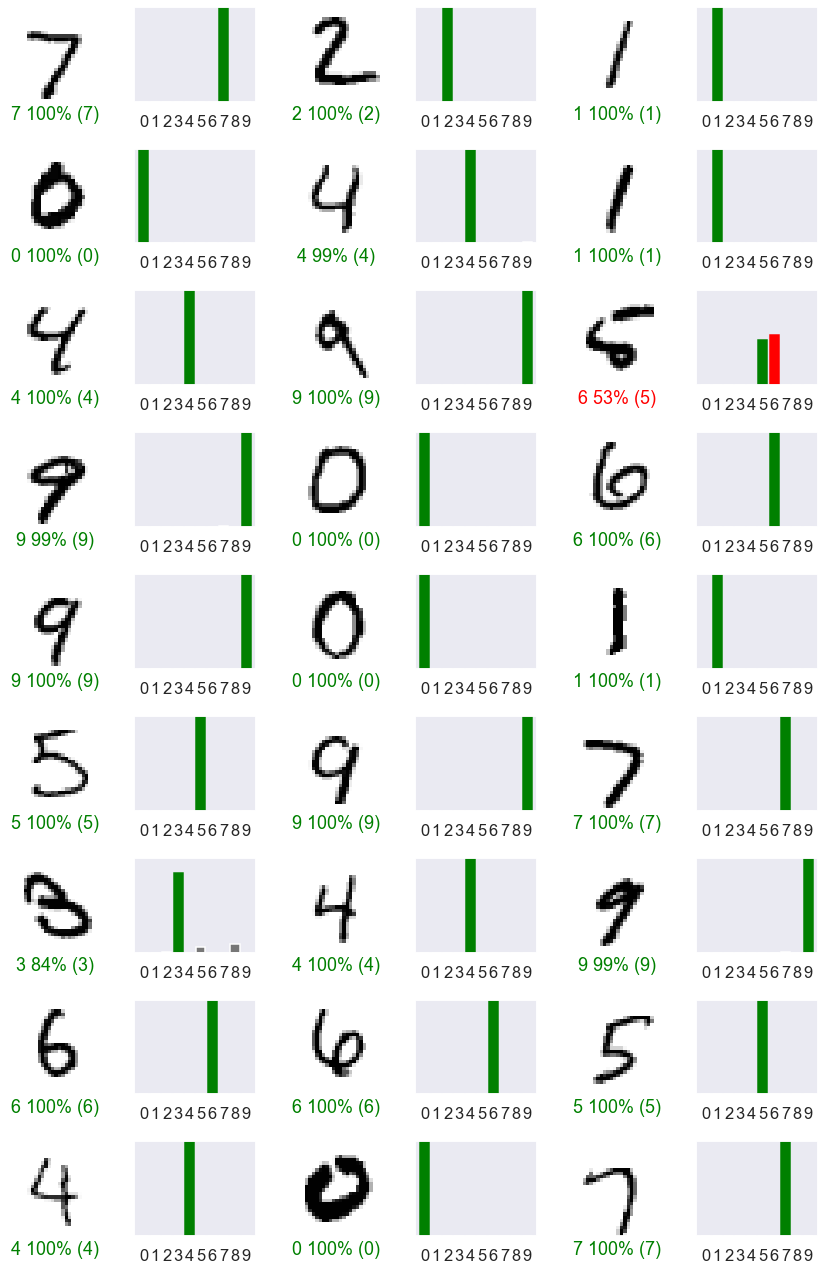

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 9
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()